## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

an A/B test run by an e-commerce website.  The goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Reading the data file and printing the first 5 rows
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Printing the data frame information to get the total number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There's <strong>294478</strong> rows

c. The number of unique users in the dataset.

In [4]:
# Finding the number of unique users id
df.user_id.nunique()

290584

In [5]:
# Dropping users id duplicates
df.user_id.drop_duplicates()

0         851104
1         804228
2         661590
3         853541
4         864975
5         936923
6         679687
7         719014
8         817355
9         839785
10        929503
11        834487
12        803683
13        944475
14        718956
15        644214
16        847721
17        888545
18        650559
19        935734
20        740805
21        759875
22        767017
23        793849
24        905617
25        746742
26        892356
27        773302
28        913579
29        736159
           ...  
294448    776137
294449    883344
294450    825594
294451    875688
294452    927527
294453    789177
294454    937338
294455    733101
294456    679096
294457    691699
294458    807595
294459    924816
294460    846225
294461    740310
294462    677163
294463    832080
294464    834362
294465    925675
294466    923948
294467    857744
294468    643562
294469    755438
294470    908354
294471    718310
294472    822004
294473    751197
294474    945152
294475    7346

d. The proportion of users converted.

In [6]:
# Dividing the sum of converted users by the number of unique users id and 
# multiplying the result by 100 to get the percentage  
(df['converted'].sum()/df.user_id.nunique())*100

12.126269856564711

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
# I chose here to group (group) column and (landing_page) by how many times values matches each other and store it in another
# column
df_dontMatch = df.groupby(['group','landing_page'], sort=False).size().reset_index(name='Count')
df_dontMatch

,group,landing_page,Count
0,control,old_page,145274
1,treatment,new_page,145311
2,control,new_page,1928
3,treatment,old_page,1965


In [8]:
# We can see above that the last two rows representing new_page and treatment not matching so the total will be:
1928 + 1965
# I'm sure there's a better way to approach but this is what I found easier for me

3893

f. Do any of the rows have missing values?

In [9]:
#Finding the sum of nullvalues in every column
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**Answer: It appears that there's no null values in any column**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Creating data frame containing control and old_page only
df_control = df.query('group=="control" & landing_page=="old_page" ')
# Creating data frame containing treatment and new__page only
df_treatment = df.query('group=="treatment" & landing_page=="new_page" ')
# Putting df_treatment below df_control to make a new data frame df2
df2 = df_control.append(df_treatment, ignore_index=True)
# Checking if the numbers are right
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
# Printing the number of unique users id
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# Printing the duplicated row
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
146678,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
# Printing the row information
df2.iloc[146678]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 146678, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# Dropping one of the duplicated rows
df2 = df2.drop(146678)

In [16]:
# Printing the data frame information to see if the row had been dropped
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# Printing the mean of converted users regardless of there page
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# Printing the mean of converted users from control group
df2.query('group=="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# Printing the mean of converted users from treatment group
df2.query('group=="treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# Dividing number of new page users over the total number of users
df2.query('landing_page=="new_page"')['landing_page'].count()/df2.user_id.count()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer: I couldn't find any information above that allows me to say that the new page nor the old page leads to more conversions since the numbers are close to each other**

# <a id='ab_test'></a>
### Part II - A/B Test

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages:



<p style="text-align: center;">$H_0: p_{new} \leq p_{old}$</p>
<br>
<p style="text-align: center;">$H_1: p_{new}  \gt p_{old}$</p>



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
# Storing the mean of converted users and printing it
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
# Storing the mean of converted users and printing it
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
# Storing the number of new page has occured in landing page column and printing it
n_new = df2[df2.landing_page=='new_page'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
# Storing the number of old page has occured in landing page column and printing it
n_old = df2[df2.landing_page=='old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# Storing samples from a binomial distribution from converted new page users
new_page_converted = np.random.binomial(1, p_new, n_new)

# I found this link is helpful: https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# Storing samples from a binomial distribution from converted old page users
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# Storing the diffrence between the mean of new page converted users and old page converted users and printing it
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.0014132249262269608

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diffs.append((new_page_converted/n_new) - (old_page_converted/n_old))
    
# My solution was taking too much time to compute and this knowledge page was helpful: 
# https://knowledge.udacity.com/questions/32164

In [29]:
# Storing it in a numPy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

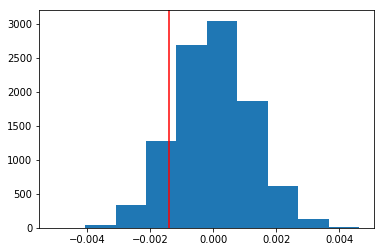

In [30]:
# Plotting a histogram of p_diffs
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color="red");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
obs_diff = (df2.query('group=="treatment"')["converted"].sum()/df2.query('group=="treatment"')['user_id'].count()- (df2.query('group=="control"')["converted"].sum()/df2.query('group=="control"')['user_id'].count()))

In [32]:
# Finding the p-value
(p_diffs >= obs_diff).mean()

0.90469999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer: The decision to reject null hypotheses is when p-value <= than alpha (which in our case alpha is 0.05) and our p-value is much larger than that so we can't reject the null hypotheses, which tells us nothing about conversion difference between old and new page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
# Calculating the sum of convert users for each group and printing them
convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
# Finding the z-score and the p-value
z_test , p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_test , p_value

# Used this helpful link:
# https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer: It doesn't mean anything since the p-value as the same as the last one I computed (0.9) we still can't reject the null hypotheses nor know the conversion diffrence between old and new page**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer: Since we are dealing with 1s and 0s we should use logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
# This knowledge page was helpful in explaining intercept concept : https://knowledge.udacity.com/questions/153181
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
# I had an issue with getting the summary and I found the solution here:
# https://github.com/statsmodels/statsmodels/issues/3931
# thats why I wrote the next two lines
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:20:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Answer: The p-value here is 0.19 and it's different because logit test based in a two-tailed test, we still cannot reject the null hypotheses since the p-value are greater than alpha (0.05)**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer: Maybe the convert rate is associated with some of the user's additional info like gender or nationality or age, So adding one of these maybe it would make a difference**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
# Reading country data frame and joining it with the previous data frame (df2)
countries = pd.read_csv('./countries.csv')
df3 = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# Printing the first 5 rows
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [39]:
# Printing the unique values of country column
df3.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [40]:
# Spliting every country in there own column
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
# Printing the first 5 rows
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [41]:
log = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'US']])
result = log.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:               1.521e-05
Time:                        13:20:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**Answer: All the p-values of the countries are larger than our alpha (0.05), so still, we cant reject null hypotheses**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
# Adding an column for every country's ab_page
df3['US_page'] = df3['US'] * df3['ab_page']
df3['UK_page'] = df3['UK'] * df3['ab_page']
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,US_page,UK_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [43]:
# Logit test and summary for it
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'UK', 'US_page', 'UK_page']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 06 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        13:20:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_page        0.0469      0.054      0.872      0.383      -0.059       0.152
UK_page        0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**Answer: The p-values still larger than our alpha (0.05), so we cant reaject the null hypotheses, and we know now that country of giving users doesnt relate to the conversion rate between old and new page**

<a id='conclusions'></a>
## Conclusion

In conclusion, there wasn't any evidence that the conversion rate indicates that the new page results in more conversion than the old page.

we tried including additional users' data such as their country and it failed to reject the null hypothesis, although maybe there's another users' information such as age or gender or nationality that will differ the test results.

## Resources
<ul>
    <li>
        I used <a src="https://github.com/AllenDowney">Allen Downey</a>'s think stats repository to help me in some of the questions asked here and to grasp more about the data-stats concepts.
    </li>
    <li>
        I also used my university's book in static, I couldn't find any online copy I have a hard copy, anyway, the book name is: Introduction to probability and statistics by abdlrahman abouammoh
    </li>
        
</ul>